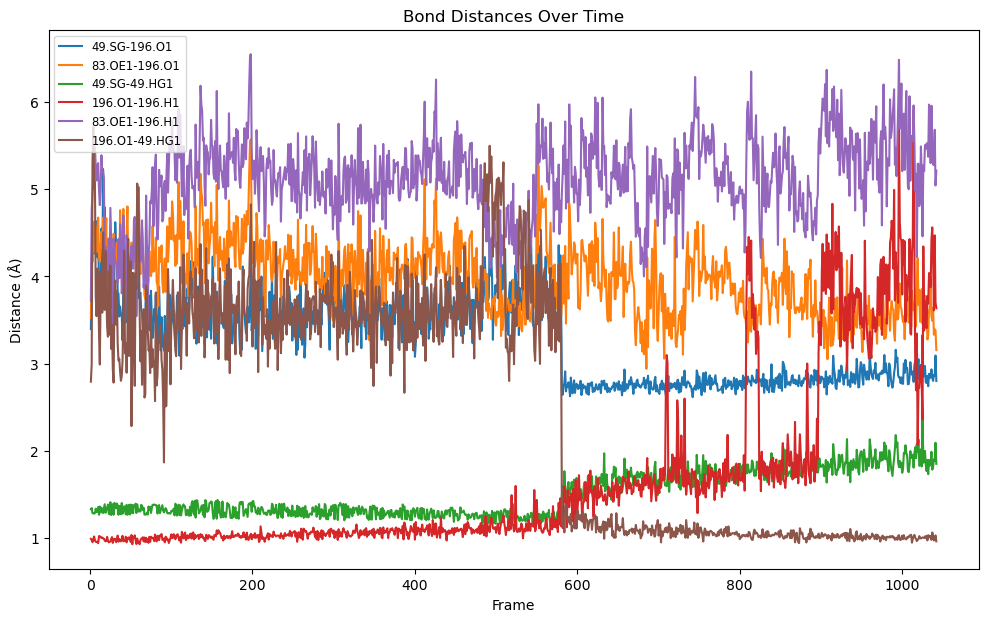

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
file_path = "3000.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

# Plot the distances for each bond
plt.figure(figsize=(12, 7))
for column in df.columns[1:]:  # Exclude 'Frame' column
    plt.plot(df["Frame"], df[column], label=column)

# Labels and title
plt.xlabel("Frame")
plt.ylabel("Distance (Å)")
plt.title("Bond Distances Over Time")
plt.legend(loc="best", fontsize="small")

# Show plot
plt.show()
